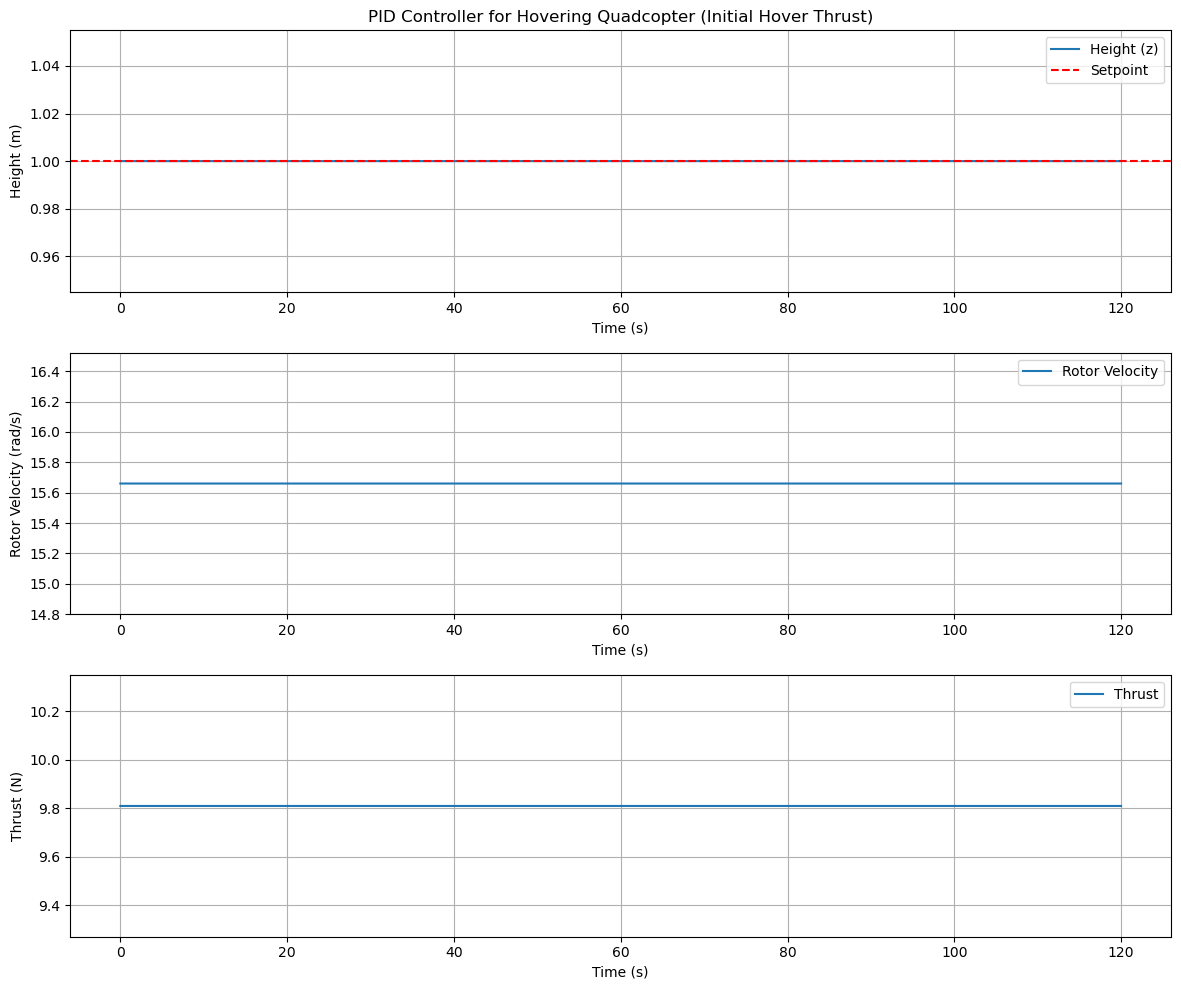

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01  # Time step (s)
t_end = 120  # Simulation time (s)
time = np.arange(0, t_end, dt)

# Quadcopter parameters
m = 1.0    # Mass (kg)
g = 9.81   # Gravitational acceleration (m/s^2)
k = 0.01   # Thrust coefficient

# PID controller gains
Kp = 20.0  # Proportional gain
Kd = 5.0   # Derivative gain
Ki = 10.0  # Integral gain

# Desired height (setpoint)
setpoint = 1 # Target height (m)

# Initial conditions
u_hover = m * g  # Thrust required to hover
w_hover = np.sqrt(u_hover / (4 * k))  # Rotor velocity for hover

z = 1         # Initial height (m)
z_dot = 0.0      # Initial vertical velocity (m/s)
error_sum = 0.0  # Accumulated error for integral term
w = w_hover      # Start with hover rotor velocity

# Store data for plotting
z_history = []  # Height over time
u_history = []  # Thrust over time
w_history = []  # Rotor velocity over time
error_history = []  # Error over time

# Simulation loop
for t in time:
    # Error terms
    error = setpoint - z  # Height error
    error_sum += error * dt  # Accumulate error for integral term
    error_dot = -z_dot       # Velocity error (negative of current velocity)

    # PID controller for thrust
    u = Kp * error + Kd * error_dot + Ki * error_sum + u_hover  # Total required thrust

    # Ensure thrust force cannot be negative
    u = max(0, u)

    # Rotor velocity update to achieve required thrust (u = 4 * k * w^2)
    w = np.sqrt(u / (4 * k))  # Compute angular velocity from thrust

    # System dynamics (vertical motion)
    z_ddot = (u - m * g) / m  # Acceleration due to thrust and gravity
    z_dot += z_ddot * dt  # Update vertical velocity
    z += z_dot * dt       # Update height

    # Store data for plotting
    z_history.append(z)
    u_history.append(u)
    w_history.append(w)
    error_history.append(error)

# Plot results
plt.figure(figsize=(12, 10))

# Height vs Time
plt.subplot(3, 1, 1)
plt.plot(time, z_history, label='Height (z)')
plt.axhline(setpoint, color='r', linestyle='--', label='Setpoint')
plt.title('PID Controller for Hovering Quadcopter (Initial Hover Thrust)')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid()

# Rotor Velocity vs Time
plt.subplot(3, 1, 2)
plt.plot(time, w_history, label='Rotor Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Rotor Velocity (rad/s)')
plt.legend()
plt.grid()

# Thrust vs Time
plt.subplot(3, 1, 3)
plt.plot(time, u_history, label='Thrust')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()